In [8]:
import yfinance as yf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

stock_data = yf.download('AAPL', start = '2025-01-01')

[*********************100%***********************]  1 of 1 completed

1 Failed download:
['AAPL']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


In [9]:
stock_data.head(10)

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,


In [10]:
stock_data.columns

MultiIndex([('Adj Close', 'AAPL'),
            (    'Close', 'AAPL'),
            (     'High', 'AAPL'),
            (      'Low', 'AAPL'),
            (     'Open', 'AAPL'),
            (   'Volume', 'AAPL')],
           names=['Price', 'Ticker'])

In [11]:
stock_data.index

DatetimeIndex([], dtype='datetime64[ns]', name='Date', freq=None)

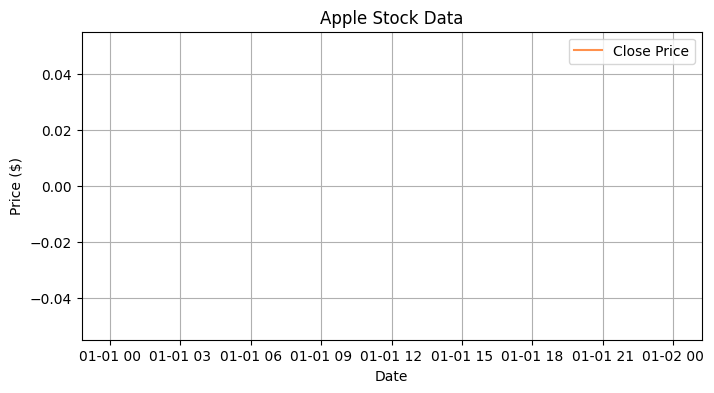

In [12]:
plt.figure(figsize=(8,4))
plt.plot(stock_data.index, stock_data['Close'], label = "Close Price", color = "#FF914D")
plt.title("Apple Stock Data")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.grid(True)
plt.show()

### Classical Time Series Decomposition

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition_additive = seasonal_decompose(stock_data['Close'], model = 'additive', period=30)

ValueError: x must have 2 complete cycles requires 60 observations. x only has 0 observation(s)

In [ ]:
trend_additive = decomposition_additive.trend
seasonal_additive = decomposition_additive.seasonal
residual_additive = decomposition_additive.resid

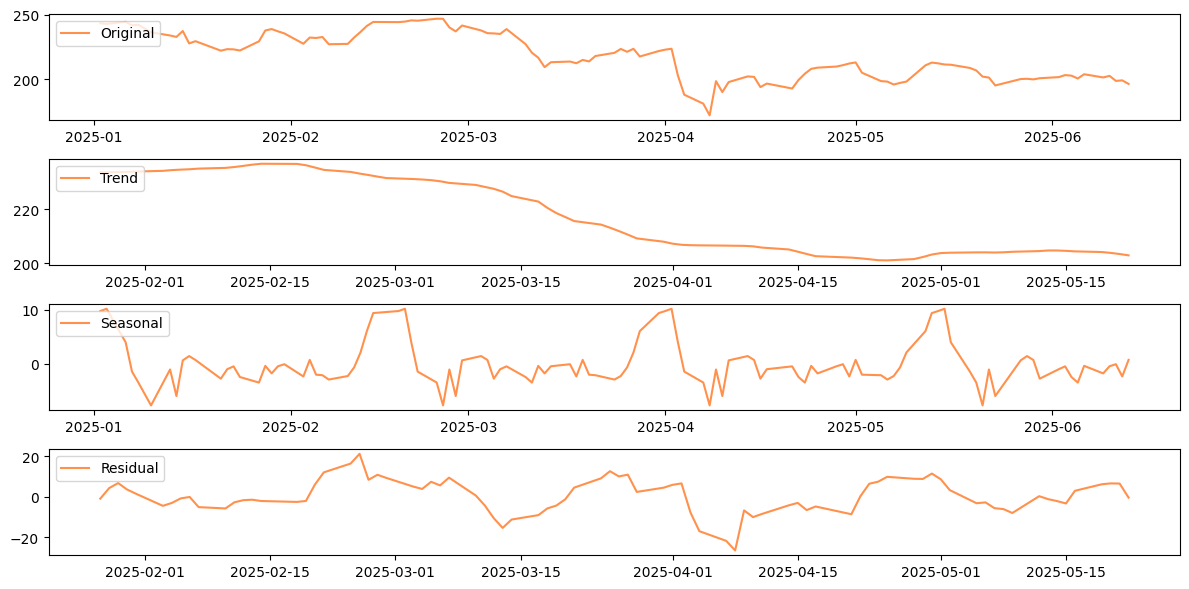

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(411)
plt.plot(stock_data['Close'], label='Original', color ='#FF914D')
plt. legend(loc='upper left')
plt.subplot(412)
plt.plot(trend_additive, label='Trend', color = '#FF914D')
plt. legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal_additive, label='Seasonal', color = '#FF914D')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual_additive, label='Residual', color = '#FF914D')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### STL Decomposition


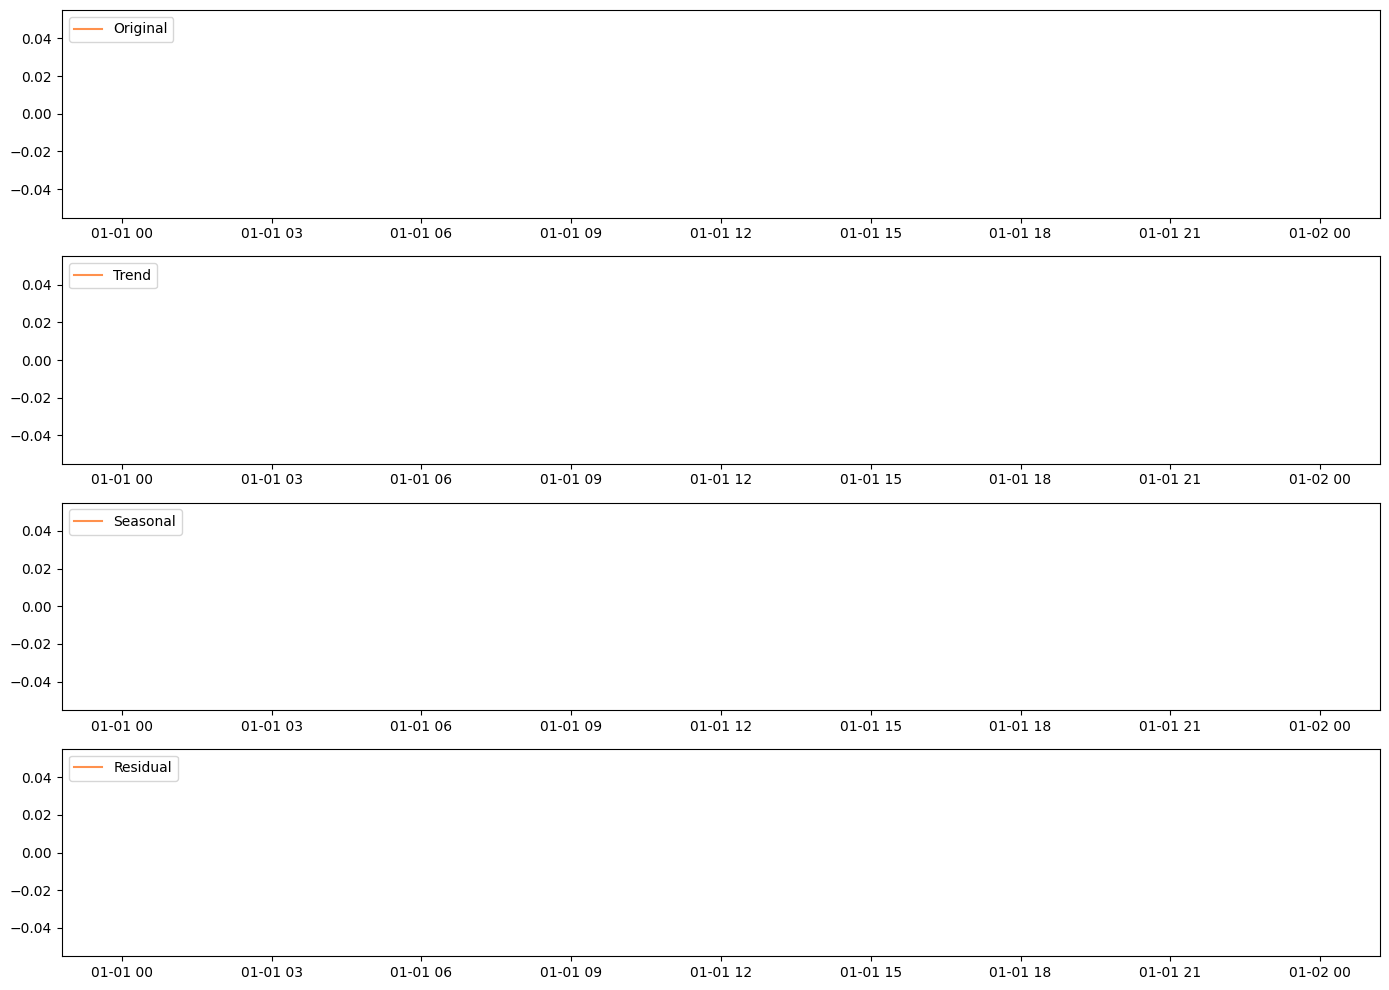

In [ ]:
from statsmodels.tsa.seasonal import STL


# Perform STL decomposition
stl = STL(stock_data['Close'], period=30) 
result = stl.fit()

# Plot the decomposition components
plt.figure(figsize=(14, 10))
plt.subplot(411)
plt.plot(result.observed, label='Original', color = '#FF914D')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(result.trend, label='Trend', color = '#FF914D')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(result.seasonal, label='Seasonal', color = '#FF914D')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(result.resid, label='Residual', color = '#FF914D')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
